In [1]:
import zipfile
zip_ref = zipfile.ZipFile("HAR.zip", 'r')
zip_ref.extractall("Human")
zip_ref.close()

<h1>  TASK
  
 1)Do hyperparameter Tunning on lstm units
  
 2)Try multiple Dropout rates
  
 Instead of 1-layer lstm create 2-LSTM layers +large dropouts(here i am using large dropout beacause my chance of overfitting reduces)

# HumanActivityRecognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB


# Quick overview of the dataset :



* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [2]:
import warnings
warnings.filterwarnings("ignore")

#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from prettytable import PrettyTable
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam,RMSprop,SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout


Using TensorFlow backend.


In [3]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [4]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [5]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'Human/HAR/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [6]:
def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'Human/HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [7]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [8]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [9]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [10]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [11]:
# Initializing parameters
epochs = 30
batch_size = 100
n_hidden = 32

In [12]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [13]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

In [14]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


In [15]:
#utility function for getting the best parameters
def best_hyperparameters(n_units,dropout_rate):
    #Initiliazing the sequential model
    model = Sequential()
    #Configuring the parameters
    model.add(LSTM(n_units, input_shape=(timesteps, input_dim)))

    #Adding a dropout layer
    model.add(Dropout(dropout_rate))
    # Adding a dense output layer with softmax activation
    model.add(Dense(n_classes, activation='softmax'))
    print(model.summary())
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer= "rmsprop") 
    return model

In [16]:
#https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/
#batch size means you can’t pass the entire dataset into the neural net at once. So, you divide dataset into Number of Batches or sets or parts.
n_units = [32,64,128]
dropout_rate = [0.3,0.4,0.5]

# Create hyperparameter options
hyperparameters = dict(n_units=n_units,dropout_rate=dropout_rate)

#Wrap Function In KerasClassifier
model1 = KerasClassifier(build_fn=best_hyperparameters,epochs = 30,batch_size = 64, verbose=1)

# Create grid search
grid = GridSearchCV(estimator=model1, param_grid=hyperparameters)

# Fit grid search
grid_result = grid.fit(X_train, Y_train,validation_data=(X_test, Y_test))
print("Best accuracy : %f using %s" % (grid_result.best_score_, grid_result.best_params_))
 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Train on 4901 samples, validate on 2947 samples
Epoch 1/30
4901/4901 [==============================] - 10s 2ms/step - loss: 1.3712 - acc: 0.4464 - val_loss: 1.2267

In [17]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    


Best: 0.929679 using {'dropout_rate': 0.3, 'n_units': 128}
0.904244 (0.007861) with: {'dropout_rate': 0.3, 'n_units': 32}
0.910637 (0.016470) with: {'dropout_rate': 0.3, 'n_units': 64}
0.929679 (0.017983) with: {'dropout_rate': 0.3, 'n_units': 128}
0.876088 (0.017744) with: {'dropout_rate': 0.4, 'n_units': 32}
0.922334 (0.012251) with: {'dropout_rate': 0.4, 'n_units': 64}
0.919342 (0.009873) with: {'dropout_rate': 0.4, 'n_units': 128}
0.903292 (0.021721) with: {'dropout_rate': 0.5, 'n_units': 32}
0.921518 (0.011848) with: {'dropout_rate': 0.5, 'n_units': 64}
0.908052 (0.016542) with: {'dropout_rate': 0.5, 'n_units': 128}


## LSTM with Best Hyperparameters

In [18]:
# Initializing paramtrers
epochs = 30 
batch_size = 64

In [19]:
from keras.layers.normalization import BatchNormalization

# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(128, input_shape=(timesteps, input_dim), kernel_initializer='uniform'))
#Adding Batch Normalization
model.add(BatchNormalization())
# Adding a dropout layer
model.add(Dropout(0.3))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, kernel_initializer='uniform', activation='sigmoid'))

model.summary()

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

#Fitting the data to the model
history = model.fit(X_train, Y_train, nb_epoch=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_29 (LSTM)               (None, 128)               70656     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_29 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 6)                 774       
Total params: 71,942
Trainable params: 71,686
Non-trainable params: 256
_________________________________________________________________


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 42s 6ms/step - loss: 1.2016 - acc: 0.4874 - val_loss: 1.2702 - val_acc: 0.4625
Epoch 2/30
7352/7352 [==============================] - 35s 5ms/step - loss: 1.0685 - acc: 0.5241 - val_loss: 1.0719 - val_acc: 0.6135
Epoch 3/30
7352/7352 [==============================] - 35s 5ms/step - loss: 0.8503 - acc: 0.6068 - val_loss: 0.7873 - val_acc: 0.5830
Epoch 4/30
7352/7352 [==============================] - 35s 5ms/step - loss: 0.8163 - acc: 0.5839 - val_loss: 1.3117 - val_acc: 0.4228
Epoch 5/30
7352/7352 [==============================] - 35s 5ms/step - loss: 0.8927 - acc: 0.5691 - val_loss: 0.8887 - val_acc: 0.5494
Epoch 6/30
7352/7352 [==============================] - 35s 5ms/step - loss: 0.7200 - acc: 0.6443 - val_loss: 0.7481 - val_acc: 0.6094
Epoch 7/30
7352/7352 [==============================] - 35s 5ms/step - loss: 0.6538 - acc: 0.6542 - val_loss: 0.6921 - val_acc: 0.6166
Epoch 8

In [ ]:
<h3> observation:- </h3>

my train loss is 0.127 and my validation loss 0.2743 it means my validation loss is slightly higher than train loss i can conclude my model is slightly overfitting

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid(True)
    fig.canvas.draw()

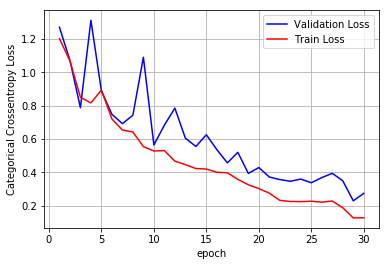

In [21]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test Score: 0.274255
Test Accuracy: 90.906006%


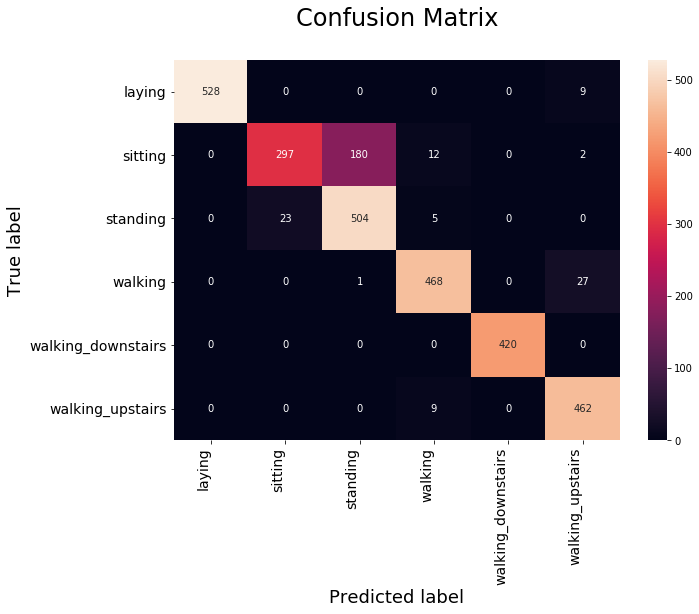

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Test Score: %f" % (scores[0]))
print("Test Accuracy: %f%%" % (scores[1]*100))

# Confusion Matrix
Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(X_test), axis=1)])

# Code for drawing seaborn heatmaps
class_names = ['laying','sitting','standing','walking','walking_downstairs','walking_upstairs']
df_heatmap = pd.DataFrame(confusion_matrix(Y_true, Y_predictions), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=14)
plt.ylabel('True label',size=18)
plt.xlabel('Predicted label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

<h3> observation :- </h3>

my model is saying that 180 members standing are predicting as sitting these 180 members are misclassified

## [2] LSTM with 2 layers with batch Normalization

In [28]:
# Initializing parameters
epochs = 30
batch_size = 64


# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(128,return_sequences=True, input_shape=(timesteps, input_dim)))
#Adding Batch Normalization
model.add(BatchNormalization())
# Adding a dropout layer
model.add(Dropout(0.9))

# Configuring the parameters
model.add(LSTM(128))
#Adding Batch Normalization
model.add(BatchNormalization())
# Adding a dropout layer
model.add(Dropout(0.9))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 128, 128)          70656     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128, 128)          512       
_________________________________________________________________
dropout_32 (Dropout)         (None, 128, 128)          0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 128)               131584    
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_33 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 6)                 774       
Total para

In [29]:
# Compiling the model
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

# Training the model
history = model.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test, Y_test),epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 99s 13ms/step - loss: 1.6037 - acc: 0.4294 - val_loss: 1.4856 - val_acc: 0.4927
Epoch 2/30
7352/7352 [==============================] - 91s 12ms/step - loss: 1.0546 - acc: 0.5603 - val_loss: 3.2995 - val_acc: 0.4961
Epoch 3/30
7352/7352 [==============================] - 92s 12ms/step - loss: 0.9186 - acc: 0.5749 - val_loss: 1.4623 - val_acc: 0.5056
Epoch 4/30
7352/7352 [==============================] - 92s 12ms/step - loss: 0.8486 - acc: 0.5834 - val_loss: 2.1186 - val_acc: 0.5049
Epoch 5/30
7352/7352 [==============================] - 91s 12ms/step - loss: 0.8047 - acc: 0.5781 - val_loss: 1.0014 - val_acc: 0.5908
Epoch 6/30
7352/7352 [==============================] - 92s 12ms/step - loss: 0.7839 - acc: 0.5547 - val_loss: 1.1357 - val_acc: 0.5100
Epoch 7/30
7352/7352 [==============================] - 92s 12ms/step - loss: 0.7683 - acc: 0.5413 - val_loss: 0.9090 - val_acc: 0.5012


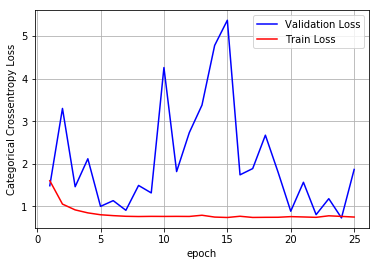

In [30]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test Score: nan
Test Accuracy: 16.830675%


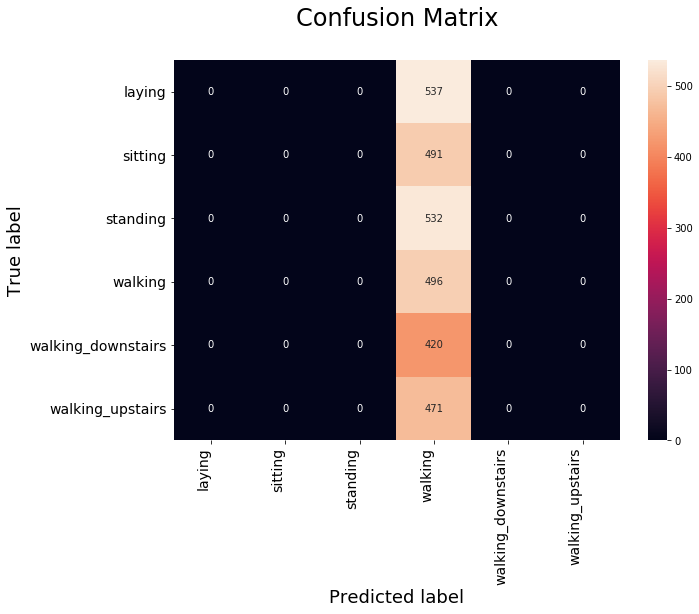

In [31]:
# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Test Score: %f" % (scores[0]))
print("Test Accuracy: %f%%" % (scores[1]*100))

# Confusion Matrix
Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(X_test), axis=1)])

# Code for drawing seaborn heatmaps
class_names = ['laying','sitting','standing','walking','walking_downstairs','walking_upstairs']
df_heatmap = pd.DataFrame(confusion_matrix(Y_true, Y_predictions), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=14)
plt.ylabel('True label',size=18)
plt.xlabel('Predicted label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

<h3> observation :- </h3>

My all points are missclassified here.

496 points which belongs to walking are correctly classified remaining all points are missclassified 

<h2> With Batch Normalization only one layer 

In [23]:
# Initializing parameters
epochs = 30
batch_size = 64


# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(128,return_sequences=True, input_shape=(timesteps, input_dim)))
#Adding Batch Normalization
model.add(BatchNormalization())
# Adding a dropout layer
model.add(Dropout(0.9))

# Configuring the parameters
model.add(LSTM(128))
# Adding a dropout layer
model.add(Dropout(0.9))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 128, 128)          70656     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128)          512       
_________________________________________________________________
dropout_30 (Dropout)         (None, 128, 128)          0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_31 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 6)                 774       
Total params: 203,526
Trainable params: 203,270
Non-trainable params: 256
_________________________________________________________________
No

In [24]:
# Compiling the model
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

# Training the model
history = model.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test, Y_test),epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 99s 13ms/step - loss: 1.3459 - acc: 0.4752 - val_loss: 1.4392 - val_acc: 0.4330
Epoch 2/30
7352/7352 [==============================] - 92s 13ms/step - loss: 0.9969 - acc: 0.6011 - val_loss: 1.2699 - val_acc: 0.5789
Epoch 3/30
7352/7352 [==============================] - 93s 13ms/step - loss: 0.8500 - acc: 0.6284 - val_loss: 2.1175 - val_acc: 0.4795
Epoch 4/30
7352/7352 [==============================] - 92s 13ms/step - loss: 0.7927 - acc: 0.6396 - val_loss: 2.2173 - val_acc: 0.5243
Epoch 5/30
7352/7352 [==============================] - 92s 13ms/step - loss: 0.7752 - acc: 0.6472 - val_loss: 0.9760 - val_acc: 0.6030
Epoch 6/30
7352/7352 [==============================] - 93s 13ms/step - loss: 0.7427 - acc: 0.6725 - val_loss: 1.5975 - val_acc: 0.4886
Epoch 7/30
7352/7352 [==============================] - 92s 13ms/step - loss: 0.6700 - acc: 0.6991 - val_loss: 0.6742 - val_acc: 0.7160


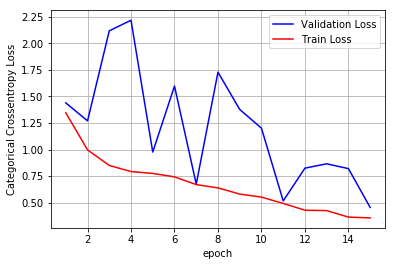

In [25]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test Score: nan
Test Accuracy: 16.830675%


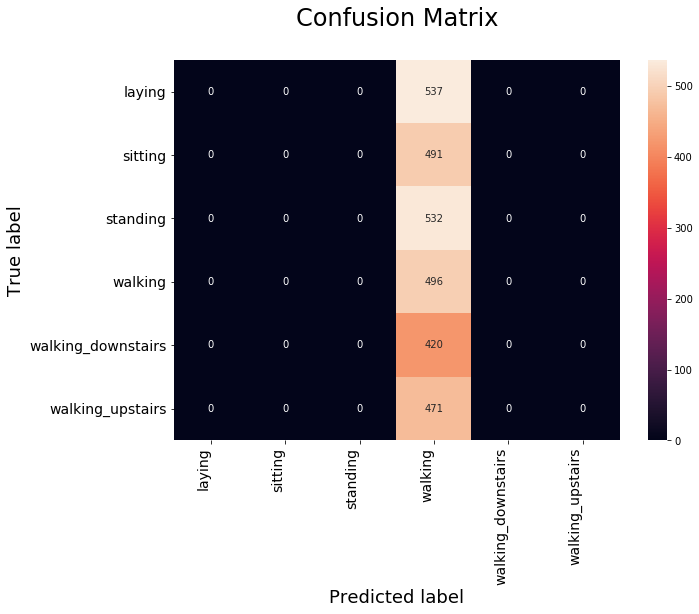

In [26]:
# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Test Score: %f" % (scores[0]))
print("Test Accuracy: %f%%" % (scores[1]*100))

# Confusion Matrix
Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(X_test), axis=1)])

# Code for drawing seaborn heatmaps
class_names = ['laying','sitting','standing','walking','walking_downstairs','walking_upstairs']
df_heatmap = pd.DataFrame(confusion_matrix(Y_true, Y_predictions), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=14)
plt.ylabel('True label',size=18)
plt.xlabel('Predicted label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

<h3> observation :- </h3>

My all points are missclassified here.

496 points which belongs to walking are correctly classified remaining all points are missclassified 

<h2> Without Batch Normalization </h2>

In [32]:
# Initializing parameters
epochs = 30
batch_size = 64


# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(128,return_sequences=True, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.9))

# Configuring the parameters
model.add(LSTM(128))
# Adding a dropout layer
model.add(Dropout(0.9))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 128, 128)          70656     
_________________________________________________________________
dropout_34 (Dropout)         (None, 128, 128)          0         
_________________________________________________________________
lstm_35 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_35 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 6)                 774       
Total params: 203,014
Trainable params: 203,014
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
# Compiling the model
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

# Training the model
history = model.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test, Y_test),epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 97s 13ms/step - loss: 1.3822 - acc: 0.4085 - val_loss: 1.1957 - val_acc: 0.5283
Epoch 2/30
7352/7352 [==============================] - 89s 12ms/step - loss: 1.1073 - acc: 0.5337 - val_loss: 0.9843 - val_acc: 0.6071
Epoch 3/30
7352/7352 [==============================] - 90s 12ms/step - loss: 0.9640 - acc: 0.5702 - val_loss: 0.9063 - val_acc: 0.5100
Epoch 4/30
7352/7352 [==============================] - 91s 12ms/step - loss: 0.8492 - acc: 0.5885 - val_loss: 0.8155 - val_acc: 0.5857
Epoch 5/30
7352/7352 [==============================] - 90s 12ms/step - loss: 0.7691 - acc: 0.6236 - val_loss: 0.7711 - val_acc: 0.6132
Epoch 6/30
7352/7352 [==============================] - 89s 12ms/step - loss: 0.7355 - acc: 0.6306 - val_loss: 0.7680 - val_acc: 0.5952
Epoch 7/30
7352/7352 [==============================] - 89s 12ms/step - loss: 0.6923 - acc: 0.6402 - val_loss: 0.8207 - val_acc: 0.6047


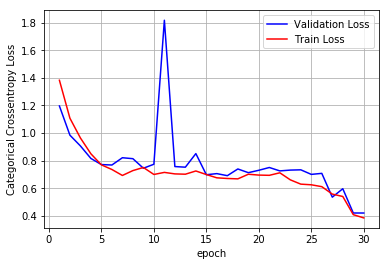

In [34]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test Score: 0.420003
Test Accuracy: 88.361045%


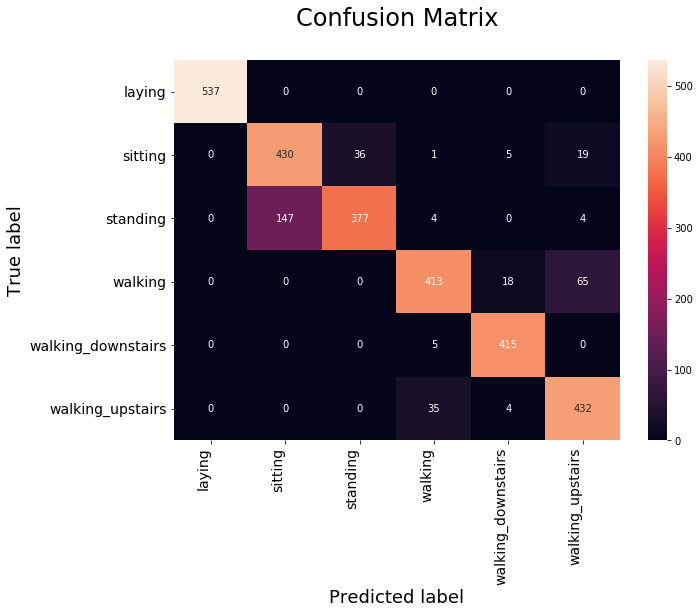

In [35]:
# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Test Score: %f" % (scores[0]))
print("Test Accuracy: %f%%" % (scores[1]*100))

# Confusion Matrix
Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(X_test), axis=1)])

# Code for drawing seaborn heatmaps
class_names = ['laying','sitting','standing','walking','walking_downstairs','walking_upstairs']
df_heatmap = pd.DataFrame(confusion_matrix(Y_true, Y_predictions), index=class_names, columns=class_names )
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=14)
plt.ylabel('True label',size=18)
plt.xlabel('Predicted label',size=18)
plt.title("Confusion Matrix\n",size=24)
plt.show()

<h3> observation :- </h3>

some points are missclassified here.

147 points which belongs to sitting are predicted as standing 

36 points which actually belongs to standing  predicted as sitting

65 points which actually belongs to walking upstairs predicted as walking

18 points which actually belongs to walkingdownstairs are predicted as walking



## Model Performane Table


In [8]:
from prettytable import PrettyTable
print("\n Model performance table of LSTM")    
x = PrettyTable()
x.field_names=["MODEL","Optimizer", "TRAIN_ACCURACY", "TEST_ACCURACY"]
x.add_row(["\n LSTM layer with 128 LSTM Units with single layer ", "rmsprop",94.19,90.91])
x.add_row(["\n LSTM layer with 128 LSTM Units with batch Normalization", "rmsprop",16.68,16.83])
x.add_row(["\n LSTM layer with 128 LSTM Units only one layer batch Normalization","rmsprop", 16.68, 16.83])
x.add_row(["\n LSTM layer with 128 LSTM Units only two without batch Normalization","rmsprop", 87.72, 88.36])
print(x)




 Model performance table of LSTM
+----------------------------------------------------------------------+-----------+----------------+---------------+
|                                MODEL                                 | Optimizer | TRAIN_ACCURACY | TEST_ACCURACY |
+----------------------------------------------------------------------+-----------+----------------+---------------+
|                                                                      |  rmsprop  |     94.19      |     90.91     |
|           LSTM layer with 128 LSTM Units with single layer           |           |                |               |
|                                                                      |  rmsprop  |     16.68      |     16.83     |
|        LSTM layer with 128 LSTM Units with batch Normalization       |           |                |               |
|                                                                      |  rmsprop  |     16.68      |     16.83     |
|   LSTM layer with 12

## Conclusion

- This case study describes activity of a human and classify them into one of six classes whether he is  WALKING, or WALKING_UPSTAIRS, or WALKING_DOWNSTAIRS,or SITTING, or STANDING, or LAYING.


- By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 


- There are 561 hand engineered features, which are built by domain experts.


- We do data cleaning stage - we checking for duplicate entries,null values,data imbalances. 


- We did exploratory data analysis
we can conclude moving and stationery activities can be very well seperated from each other.


- We had apply TSNE in order to reduce the dimensionality of the data and visualize them in 2D. where we can seperate maximum no of points.


- we build models by ML Algorithms  This gave as an unbelievable accuracy of more than 96% on unseen data. This is pretty good. By looking at all the confusion matrices, we can tell that the model performed fairly well in determining the activities, except that it confuses between sitting and standing for example.


- In the real world, domain-knowledge, EDA and feature-engineering matters most. In this experiment, without a doubt Logistic Regression and Support Vector Machines are clear winners! They have been pretty good in classifying all the 6 classes of data. That too with very high precision and recall values. The individual F1 scores for each of the predicted classes also has very high values.


- In general, the Decision Trees did not perform well. Random Forests and GBDTs did better than Decision Trees. But, both RFs and GBDTs performed poorly as compared to the Logistic Regression and SVM models.

- Decision Tree,Random Forest, GBDT are performing badd hence we ignore Them.

- Now, since we are done with ML tenchinques, let's find out if we can use the raw data to build some deep learning models with better accuracy.



<h3> Steps Involved:-  </h3>

1. Defining Task

2. Importing Libraries

3. Reading Csv file(loading Data)

4. Splitting Data into Train and Test

5. Defining Model (we will define sequential model, adding lstm units,we will add dropout to avoid overfitting model so far we defined model here we implement hyperparameter tunning by these we can achieve good results  

6. we do hyperparameter tunning on different parameters like (no of epochs,dropouts,initializer,activation function,etc)

By this we come to know so and so parameters are giving good results without overfitting we choose those parameters and we define our models calculate results like accuracy,precision recall etc

I did hyperparameter tunning on lstm layers and on dropout we can do on all parameters due to less computational power i had limited this
